# **THE MNIST DATABASE of handwritten digits**

## **1) Importação & preprocessamento dos dados**

In [1]:
import urllib.request
import gzip
import pickle
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn import metrics
import random
import sklearn
def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done")

def _change_ont_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """
    Parameters
    ----------
    normalize : Normalize the pixel values
    flatten : Flatten the images as one array
    one_hot_label : Encode the labels as a one-hot array

    Returns
    -------
    (Trainig Image, Training Label), (Test Image, Test Label)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    if one_hot_label:
        dataset['train_label'] = _change_ont_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_ont_hot_label(dataset['test_label'])

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


# Load the MNIST dataset
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "C:/Users/Igor/Desktop/TÓPICOS 2/Bancos"
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


> Cada uma das 60000 imagens para treinamento, ou das 10000 imagens para teste, é uma matriz 28x28 em que cada entrada varia de 0 até 255

> Cada uma das 784 entradas, elemento (i,j) da matriz, representa a intensidade do branco no pixel (i,j)

 > Achata-se cada matriz 28x28 em vetores coluna 784x1 para entrada no modelo

> Retorna-se à forma inicial, em matriz, para plotar os dígitos escritos à mão

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=True)

img = x_train[0]
label = t_train[0]

print("Cada imagem está achatada em um vetor coluna assim:", img.shape)


print("Coloca-se a imagem, de volta para sua forma original, em uma matriz 28x28, para plotar a figura, em que cada entrada dessa matrix é a intesidade do branco no pixel (i,j):",
img.reshape(28, 28).shape)


Cada imagem está achatada em um vetor coluna assim: (784,)
Coloca-se a imagem, de volta para sua forma original, em uma matriz 28x28, para plotar a figura, em que cada entrada dessa matrix é a intesidade do branco no pixel (i,j): (28, 28)


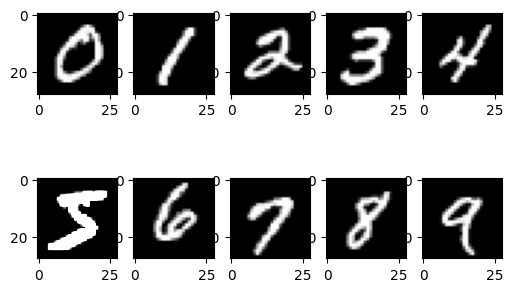

In [3]:
# Show some sample images

img1 = x_train[0].reshape(28, 28)
img2 = x_train[1].reshape(28, 28)
img3 = x_train[4].reshape(28, 28)
img4 = x_train[3].reshape(28, 28)

img5 = x_train[13].reshape(28, 28)
img6 = x_train[5].reshape(28, 28)

img7 = x_train[15].reshape(28, 28)
img8 = x_train[7].reshape(28, 28)

img9 = x_train[17].reshape(28, 28)
img10 = x_train[9].reshape(28, 28)


fig, ax = plt.subplots(2, 5, dpi = 100)
ax[0, 0].imshow(img2, cmap='gray', vmin=0, vmax=255)
ax[0, 1].imshow(img4, cmap='gray', vmin=0, vmax=255)

ax[1, 1].imshow(img5, cmap='gray', vmin=0, vmax=255)
ax[0, 2].imshow(img6, cmap='gray', vmin=0, vmax=255)

ax[1, 2].imshow(img7, cmap='gray', vmin=0, vmax=255)
ax[0, 3].imshow(img8, cmap='gray', vmin=0, vmax=255)

ax[1, 3].imshow(img9, cmap='gray', vmin=0, vmax=255)
ax[0, 4].imshow(img10, cmap='gray', vmin=0, vmax=255)

ax[1, 0].imshow(img1, cmap='gray', vmin=0, vmax=25)
ax[1, 4].imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.show()


### Faz-se esse achatamento das matrizes 28x28 em um vetor $\vec{x}$ coluna 784x1 para que:

### i) $\vec{x}$ seja uma observação no $ \mathbb{R}^{784}$

### Então seria possível classificar $\vec{x}$, em particular, a partir de SVM's.

### ii) $\vec{x}$ pode ser classificado como um número inteiro de 0 até 9


## **2) EDA**

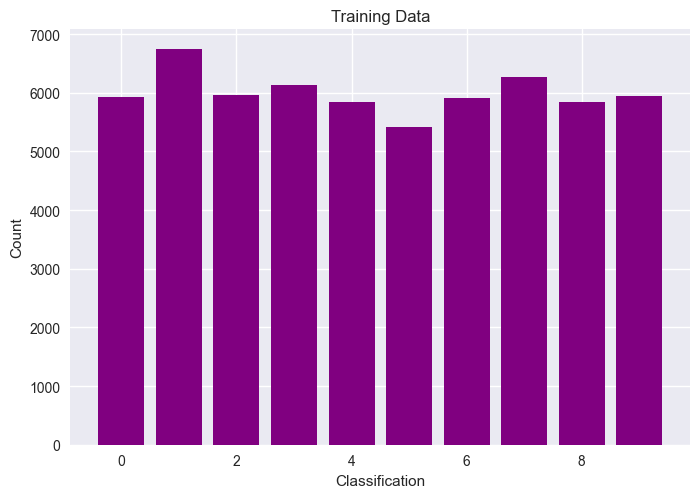

In [4]:
plt.style.use('seaborn')
fig, ax = plt.subplots(dpi=100)

for i in range(10):
    ax.bar(i, len(t_train[t_train == i]), color = "purple")

ax.set_ylabel("Count")
ax.set_xlabel("Classification")
ax.set_title("Training Data")

plt.show()


## **2) Resultados**

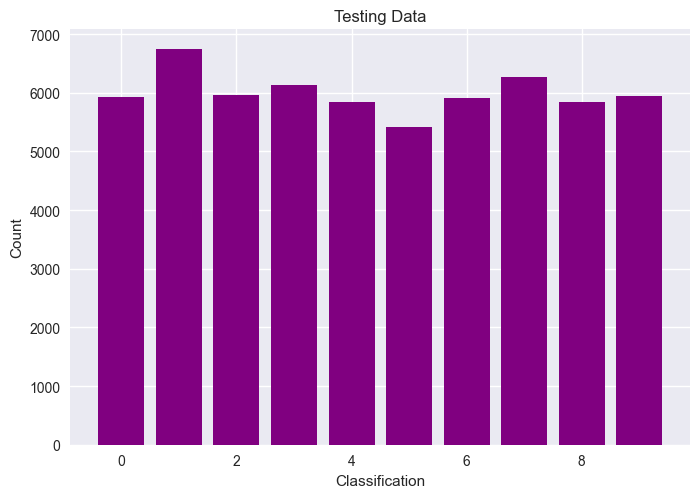

In [5]:
plt.style.use('seaborn')
fig, ax = plt.subplots(dpi=100)

for i in range(10):
    ax.bar(i, len(t_train[t_train == i]), color = "purple")

ax.set_ylabel("Count")
ax.set_xlabel("Classification")
ax.set_title("Testing Data")

plt.show()

### **Ajuste do SVM com Radial basis function (RBF) kernel**

In [6]:
svm = SVC()
svm.fit(x_train, t_train)

pred = svm.predict(x_test)

print('Acurácia:', svm.score(x_test, t_test))

#print(np.sum(svm.predict(x_test) == t_test)/len(svm.predict(x_test)))

Acurácia: 0.9792


In [7]:
#svm.score(x_test, t_test) == np.sum(svm.predict(x_test) == t_test)/len(svm.predict(x_test))

In [10]:
# Error Rate
print('Error Rate:', np.sum(pred != t_test)/len(pred))

Error Rate: 0.0208


In [16]:
sensitivity = metrics.recall_score(t_test , pred, average = 'weighted')

specificity = metrics.recall_score(np.logical_not(t_test) , np.logical_not(pred), average = 'weighted')

print('sensitivity:', np.round(sensitivity, 3))

print('specificity:', np.round(specificity, 3))

sensitivity: 0.979
specificity: 0.997


In [ ]:
# Colunas: Predicted
# Linhas: Actual

metrics.confusion_matrix(t_test, svm.predict(x_test))

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]],
      dtype=int64)

# Tabela com os resultados: SVM com Radial basis function (RBF) kernel

Acurácia  | Error Rate  | Specificity | Sensitivity
----------| ------------|------------ | ------------
 0.9792   |    2.08%    | 0.997       | 0.979



In [ ]:
erros = x_test[svm.predict(x_test) != t_test]

filtro = svm.predict(x_test) != t_test

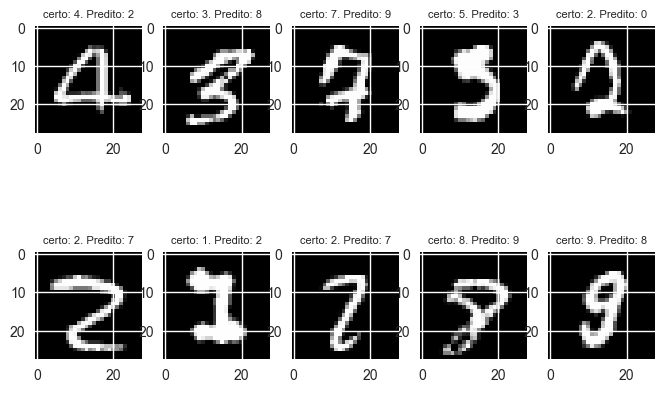

In [ ]:
random.seed(30)
erros_10 = random.sample(range(len(erros)), 10)

fig, ax = plt.subplots(2, 5, dpi = 100)

for i in range(10):
    if i == 0:
        ax[0, 0].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[0, 0].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 1:
        ax[0, 1].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[0, 1].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 2:
        ax[1, 1].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[1, 1].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 3:
        ax[0, 2].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[0, 2].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 4:
        ax[1, 2].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[1, 2].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 5:
        ax[0, 3].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[0, 3].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 6:
        ax[1, 3].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[1, 3].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 7:
        ax[0, 4].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[0, 4].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 8:
        ax[1, 0].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[1, 0].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)

    if i == 9:
        ax[1, 4].imshow(erros[erros_10][i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        ax[1, 4].set_title(str('certo: ')+ str(t_test[filtro][erros_10][i]) + str('. Predito: ') + str(svm.predict(erros[erros_10][i].reshape(1,-1))[0]),
        fontsize = 8)


plt.show()
    

### **Ajuste do SVM com Polynomial kernel**

In [ ]:
svm2 = SVC(kernel = 'poly', degree = 2)
svm2.fit(x_train, t_train)

print(svm2.score(x_test, t_test))

#print(np.sum(svm2.predict(x_test) == t_test)/len(svm2.predict(x_test)))

0.9774


In [ ]:
# Error Rate

np.sum(svm2.predict(x_test) != t_test)/len(svm2.predict(x_test))

0.0226